In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.shape

(299, 13)

In [6]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [7]:
import matplotlib.pyplot as plt

REMOVING OUTLIERS

<AxesSubplot:>

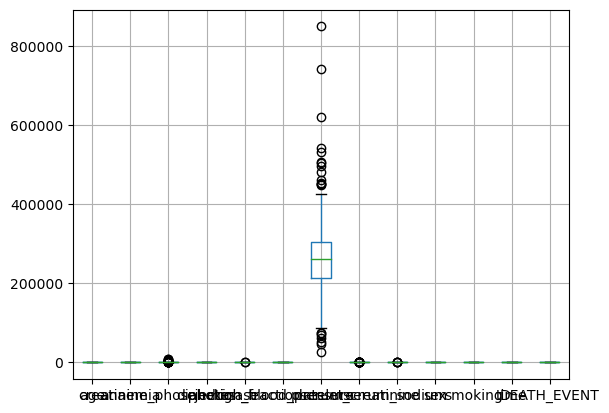

In [41]:
df.boxplot()



In [42]:
z_scores = np.abs((df - df.mean()) / df.std())

# identify outliers based on z-score threshold (e.g., z-score > 3)
outliers = df[(z_scores > 3).any(axis=1)]

# print outliers
print(outliers)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1    55.0        0                      7861         0                 38   
4    65.0        1                       160         1                 20   
9    80.0        1                       123         0                 35   
19   48.0        1                       582         1                 55   
28   58.0        1                        60         0                 38   
52   60.0        0                      3964         1                 62   
60   45.0        0                      7702         1                 25   
64   45.0        0                       582         0                 80   
72   85.0        0                      5882         0                 35   
103  42.0        0                      5209         0                 30   
105  72.0        1                       328         0                 30   
109  45.0        0                       292         1                 35   

In [9]:
def remove_outliers(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    df2 = df[(z_scores < threshold).all(axis=1)]
    return df2

# Apply the function to the DataFrame
df2 = remove_outliers(df)

# Print the original and cleaned DataFrames
print('Original DataFrame:\n', df)
print('\nCleaned DataFrame:\n', df2)

Original DataFrame:
       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine 

In [10]:
df.shape

(299, 13)

In [11]:
df2.shape

(280, 13)

In [12]:
def normalize(df2):
    return (df2 - df2.min()) / (df2.max() - df2.min())

# Apply the function to the DataFrame
df3 = normalize(df2)

In [13]:
df3.describe


<bound method NDFrame.describe of           age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    0.636364      0.0                  0.201732       0.0           0.117647   
2    0.454545      0.0                  0.044388       0.0           0.117647   
3    0.181818      1.0                  0.031757       0.0           0.117647   
5    0.909091      1.0                  0.008661       0.0           0.509804   
6    0.636364      1.0                  0.080476       0.0           0.019608   
..        ...      ...                       ...       ...                ...   
293  0.418182      1.0                  0.028870       1.0           0.411765   
294  0.400000      0.0                  0.013713       1.0           0.470588   
295  0.272727      0.0                  0.648502       0.0           0.470588   
297  0.090909      0.0                  0.862505       0.0           0.470588   
298  0.181818      0.0                  0.062432       0.0           0.6078

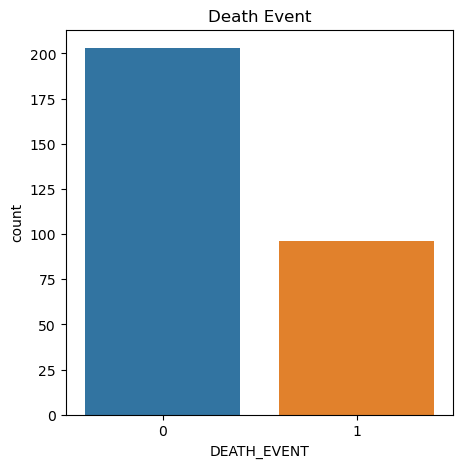

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x='DEATH_EVENT')
plt.title('Death Event')
plt.show()

In [15]:
df3['DEATH_EVENT'].value_counts(normalize=True)

0.0    0.692857
1.0    0.307143
Name: DEATH_EVENT, dtype: float64

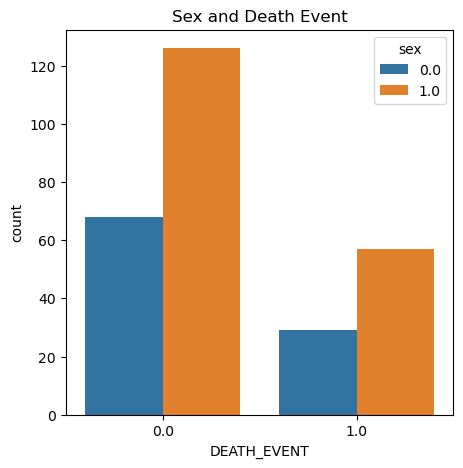

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(data = df3, x='DEATH_EVENT', hue='sex')
plt.title('Sex and Death Event')
plt.show()

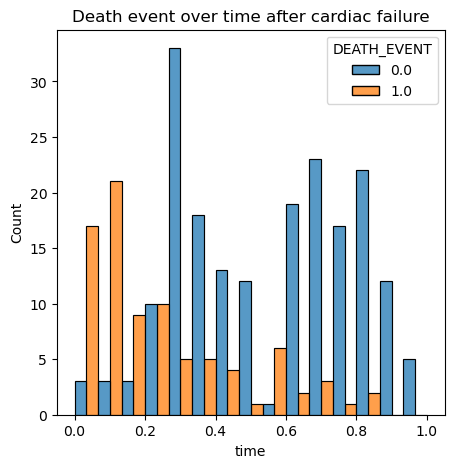

In [17]:
plt.figure(figsize=(5,5))
sns.histplot(data=df3, x='time', hue='DEATH_EVENT', bins=15, multiple='dodge')
plt.title('Death event over time after cardiac failure')
plt.show()

We can see that in the first 2 months after heart failure, chance of death is higher, but after that it is reducing.

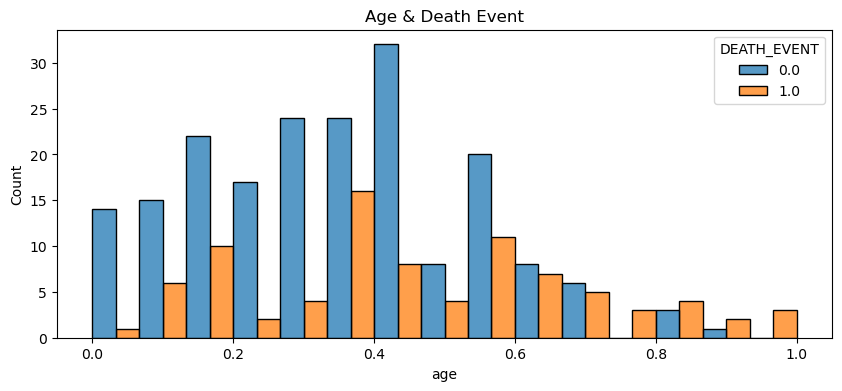

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(data=df3, x='age', hue='DEATH_EVENT', bins=15, multiple='dodge')
plt.title('Age & Death Event')
plt.show()

The survival rate is higher in the lower ages, as the age increases the chance of death increases.

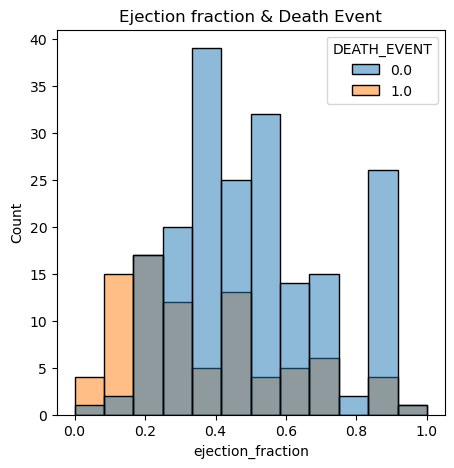

In [19]:
plt.figure(figsize=(5,5))
sns.histplot(data=df3, x='ejection_fraction', hue='DEATH_EVENT' ,multiple='layer')
plt.title('Ejection fraction & Death Event')
plt.show()

Having a large ejection fraction seems to reduce the chance of death by heart failure

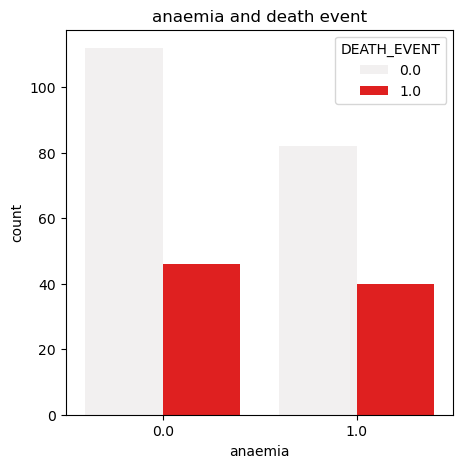

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(data = df3, x='anaemia', hue='DEATH_EVENT' ,color='red')
plt.title('anaemia and death event')
plt.show()

Anaemia increase the risk of dying after heart failure

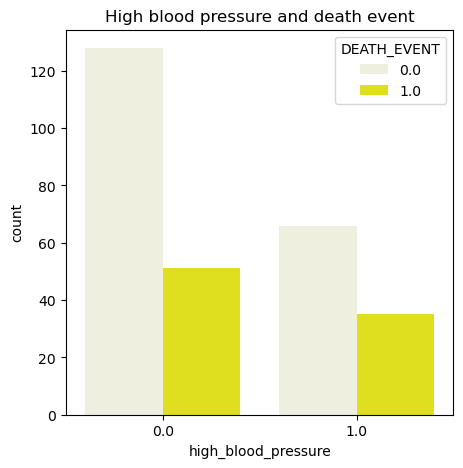

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(data=df3, x='high_blood_pressure', hue='DEATH_EVENT', color='yellow')
plt.title('High blood pressure and death event')
plt.show()

high blood pressure increases the risk of cardiac failure

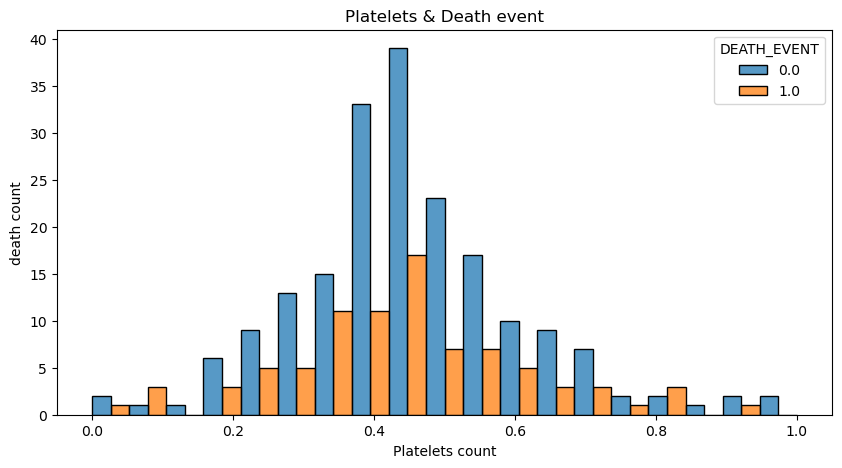

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data= df3 , x='platelets', hue='DEATH_EVENT', multiple='dodge')
plt.title('Platelets & Death event')
plt.xlabel('Platelets count')
plt.ylabel('death count')
plt.show()

High and Low platelets count seems to have a risk of death after cardiac failure.

In [23]:
corr = df3.corr()

In [24]:
corr


age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.077359                 -0.099273   
anaemia                   0.077359  1.000000                 -0.144906   
creatinine_phosphokinase -0.099273 -0.144906                  1.000000   
diabetes                 -0.082555 -0.014291                  0.011658   
ejection_fraction         0.106414  0.037141                 -0.078583   
high_blood_pressure       0.086032  0.014892                 -0.046820   
platelets                -0.028379 -0.017951                 -0.047819   
serum_creatinine          0.231830 -0.051654                 -0.087296   
serum_sodium             -0.033756  0.090741                  0.063430   
sex                       0.058342 -0.086821                  0.033589   
smoking                  -0.007560 -0.098411                 -0.079764   
time                     -0.236505 -0.136298                  0.151120   
DEATH_EVENT               0.259299  0.039480                 -0.029289   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.082555           0.106414             0.086032   
anaemia                  -0.014291           0.037141             0.014892   
creatinine_phosphokinase  0.011658          -0.078583            -0.046820   
diabetes                  1.000000          -0.007449            -0.003070   
ejection_fraction        -0.007449           1.000000             0.038059   
high_blood_pressure      -0.003070           0.038059             1.000000   
platelets                 0.067170           0.101141             0.057272   
serum_creatinine         -0.053498          -0.177942            -0.051845   
serum_sodium             -0.063822           0.182741             0.005079   
sex                      -0.159301          -0.115985            -0.109578   
smoking                  -0.136820          -0.040007            -0.059963   
time                      0.033602           0.039776            -0.217323   
DEATH_EVENT               0.001009          -0.303506             0.064143   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.028379          0.231830     -0.033756  0.058342   
anaemia                   -0.017951         -0.051654      0.090741 -0.086821   
creatinine_phosphokinase  -0.047819         -0.087296      0.063430  0.033589   
diabetes                   0.067170         -0.053498     -0.063822 -0.159301   
ejection_fraction          0.101141         -0.177942      0.182741 -0.115985   
high_blood_pressure        0.057272         -0.051845      0.005079 -0.109578   
platelets                  1.000000         -0.041153      0.021204 -0.140444   
serum_creatinine          -0.041153          1.000000     -0.245860  0.091135   
serum_sodium               0.021204         -0.245860      1.000000 -0.053602   
sex                       -0.140444          0.091135     -0.053602  1.000000   
smoking                   -0.023075         -0.008193      0.006677  0.444387   
time                       0.000260         -0.157540      0.074459 -0.007837   
DEATH_EVENT               -0.048259          0.329460     -0.203471  0.012900   

                           smoking      time  DEATH_EVENT  
age                      -0.007560 -0.236505     0.259299  
anaemia                  -0.098411 -0.136298     0.039480  
creatinine_phosphokinase -0.079764  0.151120    -0.029289  
diabetes                 -0.136820  0.033602     0.001009  
ejection_fraction        -0.040007  0.039776    -0.303506  
high_blood_pressure      -0.059963 -0.217323     0.064143  
platelets                -0.023075  0.000260    -0.048259  
serum_creatinine         -0.008193 -0.157540     0.329460  
serum_sodium              0.006677  0.074459    -0.203471  
sex                       0.444387 -0.007837     0.012900  
smoking                   1.000000 -0.020299    -0.000476  
time                     -0.020299  1.000000  

<AxesSubplot:>

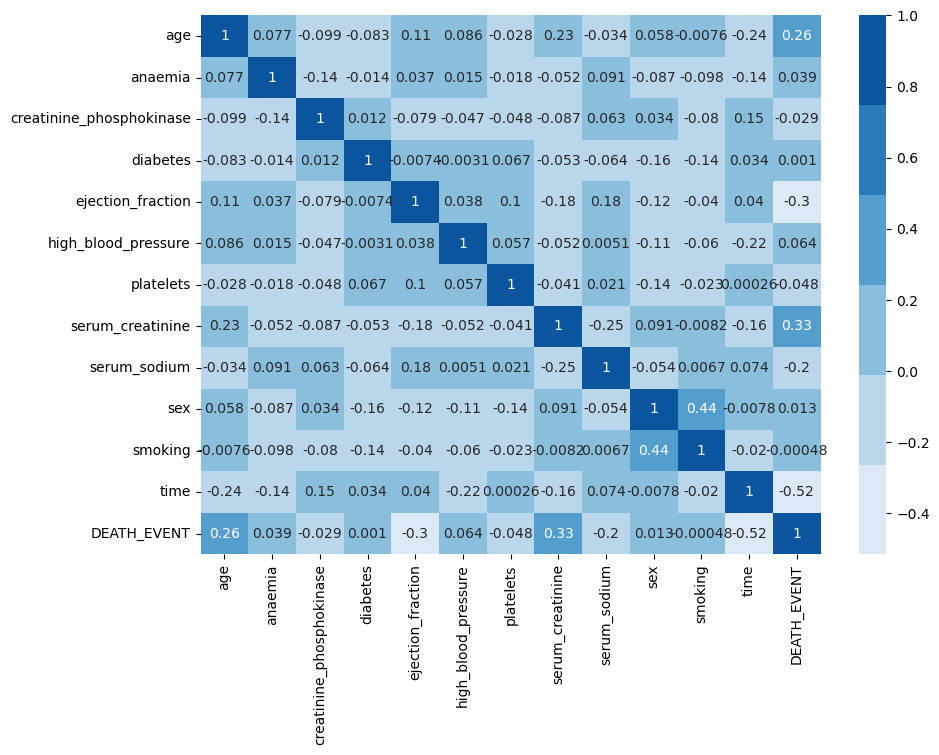

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True , cmap=sns.color_palette('Blues'))

MODELLING

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
X = df3.drop(columns=['DEATH_EVENT'], axis=1)
Y = df3['DEATH_EVENT']

In [28]:
print(X)

          age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    0.636364      0.0                  0.201732       0.0           0.117647   
2    0.454545      0.0                  0.044388       0.0           0.117647   
3    0.181818      1.0                  0.031757       0.0           0.117647   
5    0.909091      1.0                  0.008661       0.0           0.509804   
6    0.636364      1.0                  0.080476       0.0           0.019608   
..        ...      ...                       ...       ...                ...   
293  0.418182      1.0                  0.028870       1.0           0.411765   
294  0.400000      0.0                  0.013713       1.0           0.470588   
295  0.272727      0.0                  0.648502       0.0           0.470588   
297  0.090909      0.0                  0.862505       0.0           0.470588   
298  0.181818      0.0                  0.062432       0.0           0.607843   

     high_blood_pressure  p

In [29]:
print(Y)

0      1.0
2      1.0
3      1.0
5      1.0
6      1.0
      ... 
293    0.0
294    0.0
295    0.0
297    0.0
298    0.0
Name: DEATH_EVENT, Length: 280, dtype: float64


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(280, 12) (224, 12) (56, 12)


In [32]:
# Feature Scaling using Standard Scaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

.

MODEL BUILDING

NAIVE BAYESIAN MODEL

In [34]:
from sklearn.naive_bayes import GaussianNB

Accuracy:  0.8214285714285714
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88        39
         1.0       0.77      0.59      0.67        17

    accuracy                           0.82        56
   macro avg       0.80      0.76      0.77        56
weighted avg       0.82      0.82      0.81        56



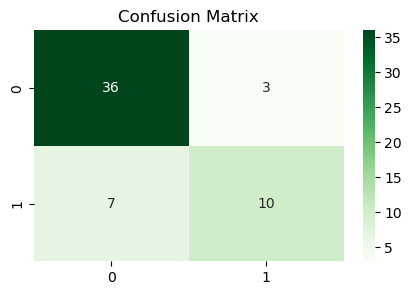

In [35]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(Y_test, y_pred))

cmat = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="Greens");

LOGISTIC REGRESSION

Accuracy:  0.8035714285714286
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86        39
         1.0       0.67      0.71      0.69        17

    accuracy                           0.80        56
   macro avg       0.77      0.78      0.77        56
weighted avg       0.81      0.80      0.81        56



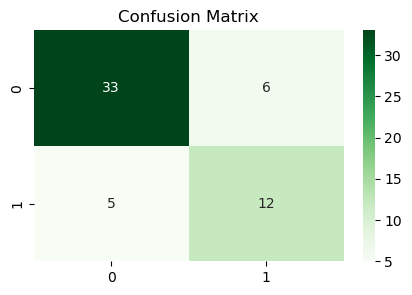

In [36]:
lg = LogisticRegression(random_state=1)
lg.fit(X_train, Y_train)

y_pred = lg.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(Y_test, y_pred))

cmat = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="Greens");

#DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeClassifier

Accuracy:  0.8392857142857143
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88        39
         1.0       0.72      0.76      0.74        17

    accuracy                           0.84        56
   macro avg       0.81      0.82      0.81        56
weighted avg       0.84      0.84      0.84        56



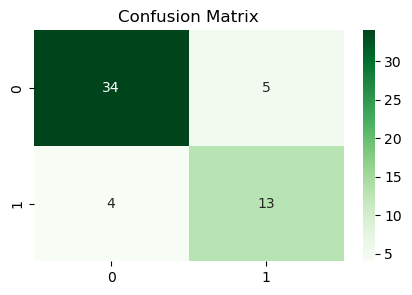

In [38]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dtc.fit(X_train, Y_train)

y_pred = dtc.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(Y_test, y_pred))

cmat = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="Greens");

SUPPORT VECTOR MACHINE

In [39]:
from sklearn.svm import SVC

Accuracy:  0.7857142857142857
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85        39
         1.0       0.69      0.53      0.60        17

    accuracy                           0.79        56
   macro avg       0.75      0.71      0.73        56
weighted avg       0.78      0.79      0.78        56



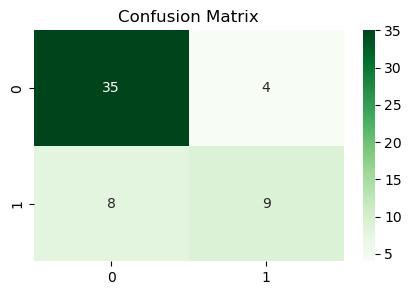

In [40]:
svm = SVC(kernel = 'rbf', random_state=1)
svm.fit(X_train, Y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ",accuracy)
print(classification_report(Y_test, y_pred))

cmat = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cmat,annot=True,cmap="Greens");